In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import datetime

from astropy.time import Time

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
J05_file = 'J:A+A:440:735:table2.dat.csv'
new_file = 'light_curve_53d97e77-9ed7-4d90-ba7e-8a1f4cf7b50f.csv'

J05 = pd.read_csv(J05_file)
J05_Vmag=7.567

# from https://asas-sn.osu.edu/light_curves/53d97e77-9ed7-4d90-ba7e-8a1f4cf7b50f
asas = pd.read_csv(new_file)

print(J05.columns)
print(asas.columns)

Index(['star', 'hjd', 'dv', 'err'], dtype='object')
Index(['HJD', 'UT Date', 'Camera', 'FWHM', 'Limit', 'mag', 'mag_err',
       'flux(mJy)', 'flux_err'],
      dtype='object')


In [3]:
# from Zac's repo directly!
nuv_file = 'https://raw.githubusercontent.com/ZacheryLaycock/GALEX_MtWilson/master/EKDra.csv'
galex = pd.read_csv(nuv_file)
# galex

# nuv_jd = np.zeros(galex.shape[0], dtype=np.float)
# for k in range(galex.shape[0]):
#     t = Time(pd.to_datetime(galex['minPhotoObsDate'][k]).to_datetime(), scale ='utc')
#     nuv_jd[k] = t.jd
# print(galex.columns)

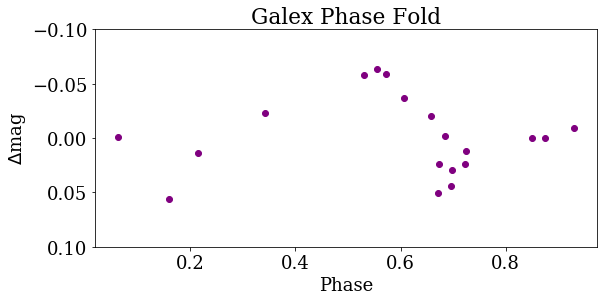

In [4]:
# GALEX phase folding
nuv_mag = np.array(galex['nuv_mag'].values, dtype=np.float)
obsDate1 = []
obsDate1jyear = []
for k in range(len(galex)):
        t = Time(((pd.to_datetime(galex['minPhotoObsDate'][k]).to_julian_date() +
                   pd.to_datetime(galex['maxPhotoObsDate'][k]).to_julian_date())/2),format = 'jd', scale ='utc')
        obsDate1.append(t.jd)
        obsDate1jyear.append(t.jyear)
obsDate1 = np.array(obsDate1)
obsDate1jyear = np.array(obsDate1jyear)
P_rot = 2.682 # days - from Messina & Guinan (2003)


phase1 = np.mod(obsDate1, P_rot)/P_rot

OK = (nuv_mag < 13.1)

plt.figure(figsize=(9,4)) ###


plt.errorbar(phase1, nuv_mag - np.median(nuv_mag), yerr = galex['nuv_magerr'].values, 
             linestyle = 'none', marker = 'o', c='purple')
plt.xlabel('Phase')
plt.ylabel(r'$\Delta$' + 'mag')
plt.title('Galex Phase Fold')
plt.gca().invert_yaxis()
plt.ylim(.1,-.1)
plt.show()

In [28]:
# Zac used this file, but direct link to VizieR: http://cdsarc.u-strasbg.fr/viz-bin/Cat?J/A%2bA/393/225
old_file = 'http://vizier.cfa.harvard.edu/viz-bin/nph-Cat/txt?J%2FA%2BA%2F393%2F225/table7.dat'
MG02 = pd.read_table(old_file, names=('epoch', 'hjd0', 'hjd1', 'Nnights','V','source'), 
                     delimiter='|', skiprows=6, comment='-')
# MG02

In [29]:
# get MG02 dates into jyear for plots
obsDate2jyear = []
for k in range(len(MG02)):
        t = Time((MG02['hjd0'][k] + MG02['hjd1'][k])/2,format = 'jd', scale ='utc')
        obsDate2jyear.append(t.jyear)
#         if(k == 50):
#             break
obsDate2jyear = np.array(obsDate2jyear)

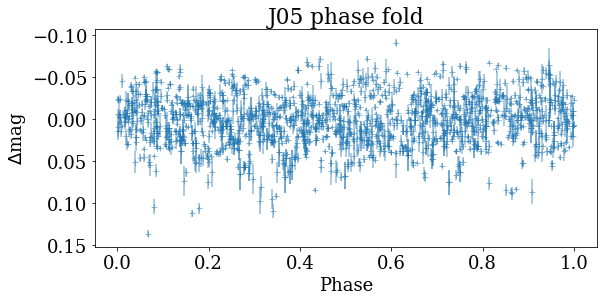

In [30]:
# Phase folding for Jaervinen+05 data
v_mag = []
v_magErr = []
obsDate3 = []
obsDate3jyear = []
for k in range(len(J05)):
    if J05['star'][k]=='EKDRA':
        t = Time(J05['hjd'][k],format = 'jd', scale ='utc')
        obsDate3.append(t.jd)
        obsDate3jyear.append(t.jyear)
        v_mag.append(J05['dv'][k] + J05_Vmag)
        v_magErr.append(J05['err'][k])
#         if(k == 50):
#             break
obsDate3 = np.array(obsDate3)
obsDate3jyear = np.array(obsDate3jyear)
v_mag = np.array(v_mag, dtype = np.float)
v_magErr = np.array(v_magErr, dtype = np.float)

P_rot = 2.682 # days - from Messina & Guinan (2003)
phase3 = np.mod(obsDate3, P_rot)/P_rot

plt.figure(figsize=(9,4))
plt.errorbar(phase3, v_mag - np.median(v_mag), yerr = v_magErr, linestyle = 'none', marker = '+', alpha=0.5)
plt.xlabel('Phase')
plt.ylabel(r'$\Delta$' + 'mag')
plt.title('J05 phase fold')
plt.gca().invert_yaxis()
plt.show()

In [31]:
phase3.shape

(1560,)

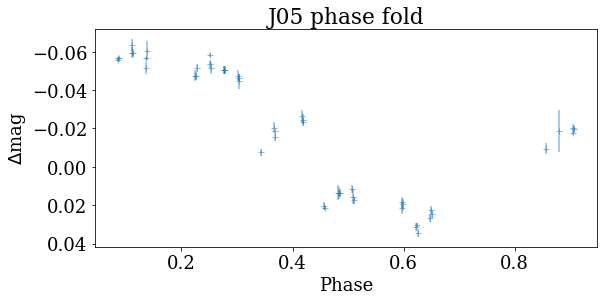

In [32]:
plt.figure(figsize=(9,4))
Nstop = 50
plt.errorbar(phase3[0:Nstop], v_mag[0:Nstop] - np.median(v_mag), yerr = v_magErr[0:Nstop], 
             linestyle = 'none', marker = '+', alpha=0.5)
# plt.errorbar(phase3[1000:1050], v_mag[1000:1050] - np.median(v_mag), yerr = v_magErr[1000:1050], 
#              linestyle = 'none', marker = '+', alpha=0.5)

plt.xlabel('Phase')
plt.ylabel(r'$\Delta$' + 'mag')
plt.title('J05 phase fold')
plt.gca().invert_yaxis()

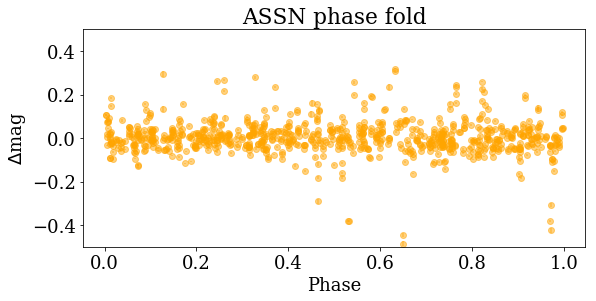

In [35]:
# Phase folding for ASSN data
# v_mag4 = np.array(asas['mag'], dtype = np.float)
# v_magErr4 = np.array(asas['mag_err'], dtype = np.float)

v_mag4 = []
v_magErr4 = []
obsDate4 = []
obsDate4jyear = []
for k in range(len(asas)):
    t = Time(asas['HJD'][k], format = 'jd', scale ='utc')
    obsDate4.append(t.jd)
    obsDate4jyear.append(t.jyear)
    v_mag4.append(asas['mag'][k])
    v_magErr4.append(asas['mag_err'][k])
#     if k == 10:
#         break
        
obsDate4 = np.array(obsDate4)
obsDate4jyear = np.array(obsDate4jyear)
v_mag4 = np.array(v_mag4, dtype = np.float)
v_magErr4 = np.array(v_magErr4, dtype = np.float)

# print(obsDate4.size)
# print(v_mag4.size)
# print(v_magErr4.size)

P_rot = 2.682 # days - from Messina & Guinan (2003)
phase4 = np.mod(obsDate4, P_rot)/P_rot

# print(phase4.size)

OK = (v_mag4 < 20)
obsDate4jyear = obsDate4jyear[OK]

plt.figure(figsize=(9,4))
plt.errorbar(phase4[OK], v_mag4[OK] - np.median(v_mag4[OK]), yerr = v_magErr4[OK], linestyle = 'none', marker = 'o', alpha=0.5, c = 'orange')
plt.xlabel('Phase')
plt.ylabel(r'$\Delta$' + 'mag')
plt.title('ASSN phase fold')
plt.ylim(.5,-.5)
plt.gca().invert_yaxis()
plt.show()

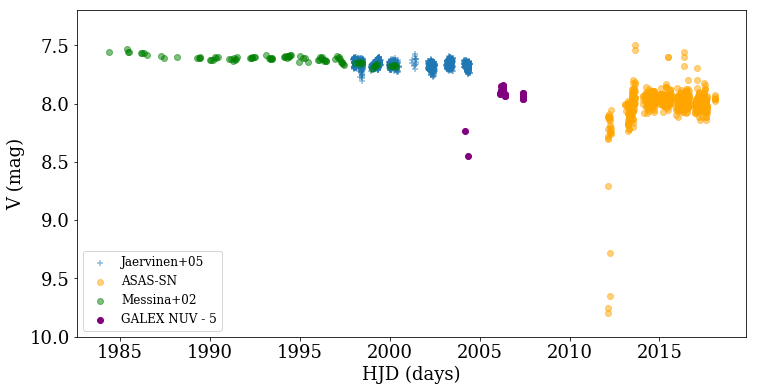

In [39]:
plt.figure(figsize=(12,6))

ekdra = J05[u'star']=='EKDRA'
# plt.scatter(J05[u'hjd'][ekdra], J05[u'dv'][ekdra] + J05_Vmag, marker='+', alpha=0.5, label='Jaervinen+05')
plt.scatter(obsDate3jyear, J05[u'dv'][ekdra] + J05_Vmag, marker='+', alpha=0.5, label='Jaervinen+05')

aok = asas[u'mag'] < 20
# plt.scatter(asas[u'HJD'][aok], asas[u'mag'][aok], alpha=0.5, label='ASAS-SN')
plt.scatter(obsDate4jyear, asas[u'mag'][aok], alpha=0.5, c= 'orange', label='ASAS-SN')

# plt.scatter((MG02['hjd0']+MG02['hjd1'])/2., MG02['V'], alpha=0.5, label='Messina+02')
plt.scatter(obsDate2jyear, MG02['V'], alpha=0.5, c = 'green', label='Messina+02')

# plt.scatter(nuv_jd, galex[u'nuv_mag']-5, c='purple', label='GALEX NUV - 5')
plt.scatter(obsDate1jyear, galex[u'nuv_mag']-5, c='purple', label='GALEX NUV - 5')

plt.ylim(10,7.2)
# plt.ylim(8.4,7.4)
plt.xlabel('HJD (days)')
# plt.xlabel('jyear')
plt.ylabel('V (mag)')
plt.legend(fontsize=12, loc='lower left')

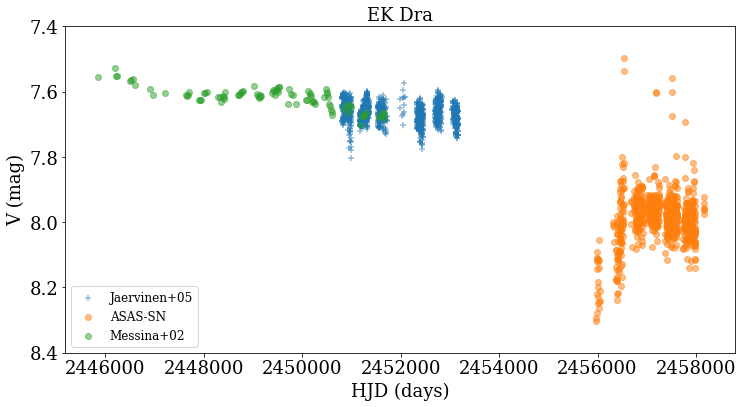

In [43]:
# Let's assume the very faint stuff from ASAS-SN is wrong (for now)

plt.figure(figsize=(12,6))

ekdra = J05[u'star']=='EKDRA'
plt.scatter(J05[u'hjd'][ekdra], J05[u'dv'][ekdra] + J05_Vmag, marker='+', alpha=0.5, label='Jaervinen+05')

aok = asas[u'mag'] < 20
plt.scatter(asas[u'HJD'][aok], asas[u'mag'][aok], alpha=0.5, label='ASAS-SN')

plt.scatter((MG02['hjd0']+MG02['hjd1'])/2., MG02['V'], alpha=0.5, label='Messina+02')

# plt.scatter(nuv_jd, galex[u'nuv_mag']-5, c='purple', label='GALEX NUV - 5')
# plt.scatter(obsDate1jyear, galex[u'nuv_mag']-5, c='purple', label='GALEX NUV - 5')


plt.ylim(8.4,7.4)
plt.xlabel('HJD (days)')
plt.ylabel('V (mag)')
plt.title('EK Dra', fontsize=18)
plt.legend(fontsize=12, loc='lower left')
plt.savefig('EK_Dra_V.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

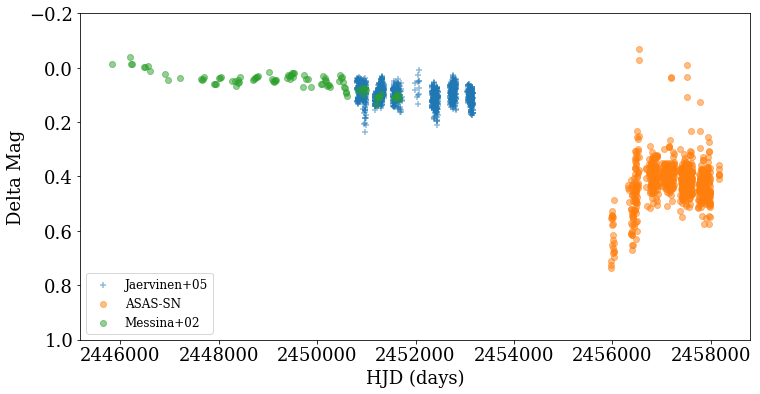

In [45]:
plt.figure(figsize=(12,6))

ekdra = J05[u'star']=='EKDRA'
plt.scatter(J05[u'hjd'][ekdra], J05[u'dv'][ekdra] , marker='+', alpha=0.5, label='Jaervinen+05')

aok = asas[u'mag'] < 20
plt.scatter(asas[u'HJD'][aok], asas[u'mag'][aok] - J05_Vmag, alpha=0.5, label='ASAS-SN')

plt.scatter((MG02['hjd0']+MG02['hjd1'])/2., MG02['V'] - J05_Vmag, alpha=0.5, label='Messina+02')

# plt.scatter(nuv_jd, galex[u'nuv_mag']-np.median(galex[u'nuv_mag']), c='purple', label='GALEX NUV - 5')

plt.xlabel('HJD (days)')
plt.ylabel('Delta Mag')
plt.ylim(1, -0.2)
plt.legend(fontsize=12, loc='lower left')

In [ ]:
'''
goals:
measure Period for each year of data in Blue and Orange
make phase-curve for each year of data in Blue and Orange 

one trick to find the "years":
look for chunks of continuous data , where the delta-t is less than, say, 10 days

'''

(2014.5, 2014.7)

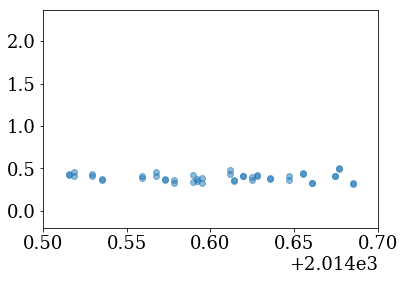

In [49]:
plt.scatter(obsDate4jyear, asas[u'mag'][aok] - J05_Vmag, alpha=0.5, label='ASAS-SN')
plt.xlim(2014.5,2014.7)